In [1]:
import json
from utils import *
from run import run_, RASTRIGIN_ARGS, ROSENBROCK_ARGS, ACKLEY_ARGS, SCHWEFEL_ARGS
import matplotlib.pyplot as plt
import numpy as np

In [2]:
args = ACKLEY_ARGS 
filename_ = "ackley_es"

run_(args, filename=filename_, n_runs=3)
display(args)

'3 solutions of 3 were found in 65.64 seconds'

{'n_iterations': 1500,
 'population_size': 300,
 'dimensions': 30,
 'number_of_parents': 300,
 'function': 'ackley',
 'crossover_rate': 1,
 'learning_rate': 1.1,
 'global_learning_rate': 1.1,
 'epsilon': 0.01,
 'selection_pressure': 7,
 'crossover': 'discrete',
 'survivors_selection': 'plus',
 'parents_selection': 'best'}

In [3]:
with open(filename_ + '.json', 'r') as f:
    data_ackley = json.load(f)

### Média de iterações para o algoritmo convergir

Text(-0.4, 2.16, 'Std: 2.16')

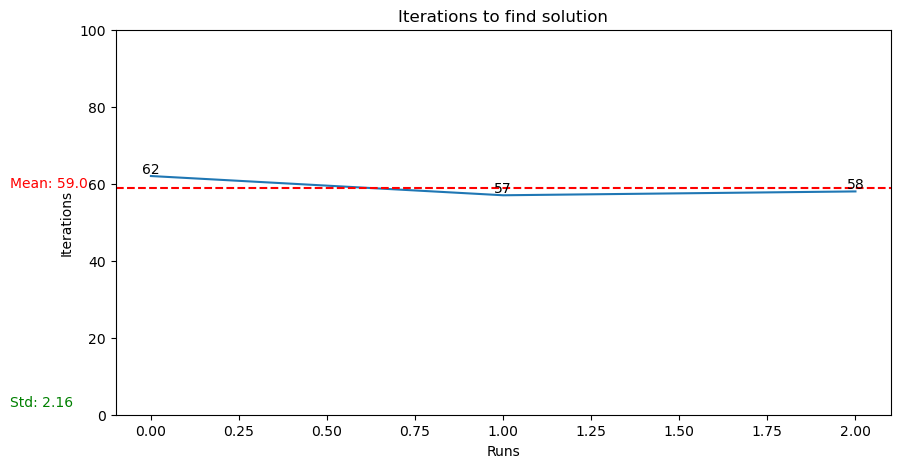

In [4]:
solutions = [i for i in data_ackley if i["found_solution"]]

iterations_info = [i["iterations"] for i in solutions]

iterations_mean = np.mean(iterations_info)
rounded_mean = round(iterations_mean, 2)

iterations_std = np.std(iterations_info)
rounded_std = round(iterations_std, 2)

plt.figure(figsize=(10, 5))
plt.title("Iterations to find solution")
plt.xlabel("Runs")
plt.ylabel("Iterations")
plt.ylim(0, 100)

plt.plot(iterations_info)
for i in range(len(iterations_info)):
    plt.text(i, iterations_info[i], str(iterations_info[i]), ha='center', va='bottom', color='black')
    
# put mean as a red line
plt.axhline(y=iterations_mean, color='r', linestyle='--')
plt.text(-0.4, rounded_mean, "Mean: " + str(rounded_mean), color='r')

# put std as a green line
#plt.axhline(y=rounded_std, color='g', linestyle='--')
plt.text(-0.4, rounded_std, "Std: " + str(rounded_std), color='g')

### Fitnes médio da população (média da média)

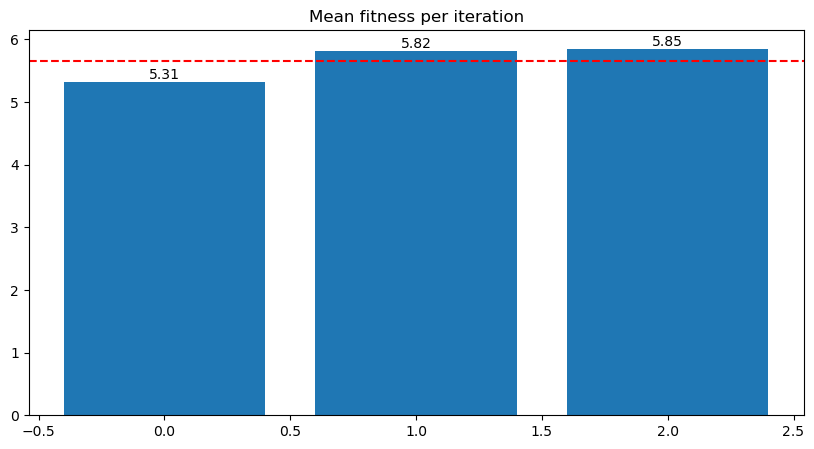

In [6]:
mean_fitness_per_iteration = []
for run in data_ackley:
    mean_fitness_per_iteration.append(np.mean(run["mean_per_iteration"]))
    
    
plt.figure(figsize=(10, 5))
plt.title("Mean fitness per iteration")
plt.bar(range(len(mean_fitness_per_iteration)), mean_fitness_per_iteration)


for i in range(len(mean_fitness_per_iteration)):
    plt.text(i, mean_fitness_per_iteration[i], f"{mean_fitness_per_iteration[i]:.2f}", ha="center", va="bottom")

plt.axhline(y=np.mean(mean_fitness_per_iteration), color="red", linestyle="--", label="Mean")

### Fitness médio da ultima geração

Text(-0.7, 0.12174525834504153, 'Mean: 0.12')

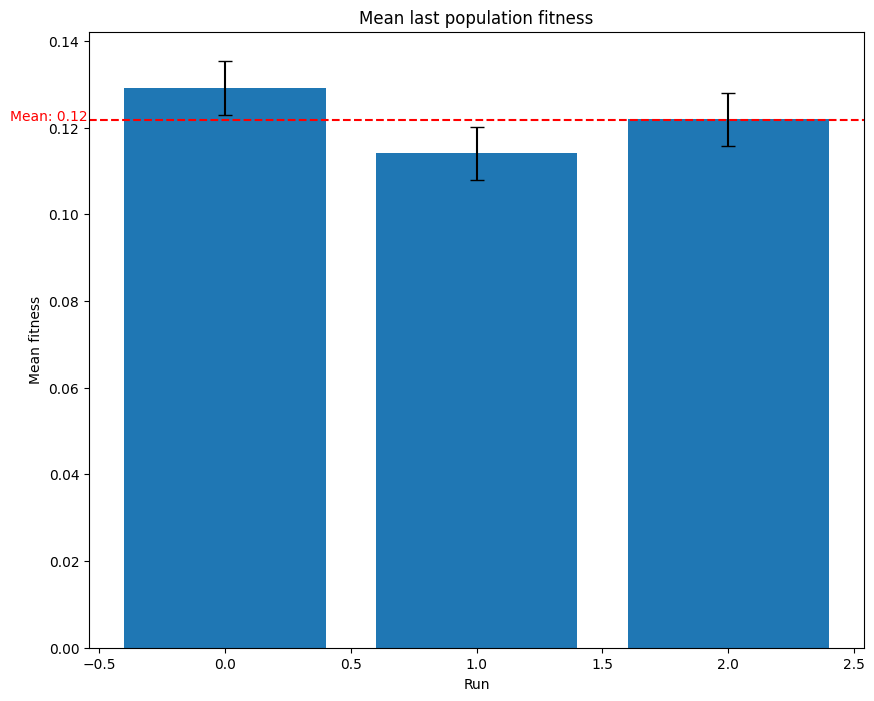

In [6]:
mean_last_pop = []
for run in data_ackley:
    mean_last_pop.append(np.mean(run["last_population_fitness"]))

mean = np.mean(mean_last_pop)
std = np.std(mean_last_pop)

plt.figure(figsize=(10, 8))
plt.title("Mean last population fitness")
plt.xlabel("Run")
plt.ylabel("Mean fitness")

plt.bar(range(len(mean_last_pop)), mean_last_pop, yerr=std, capsize=5)

    
plt.axhline(y=mean, color='r', linestyle='--')
plt.text(-0.7, mean, "Mean: " + str(round(mean, 2)), ha="center", color='r')

### Gráficos de convergência

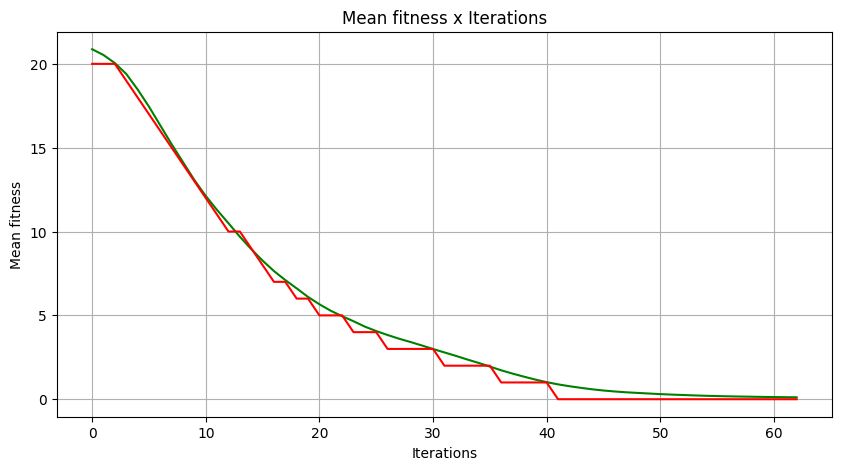

In [7]:
# max

datas_max = []
datas_max.append(max(solutions, key=lambda x: x["iterations"]))

plt.figure(figsize=(10, 5))
plt.title("Mean fitness x Iterations")
plt.xlabel("Iterations")
plt.ylabel("Mean fitness")
plt.grid(True)

for i in range(len(datas_max)):
    mean_per_iteration = datas_max[i]["mean_per_iteration"]
    best_per_iteration = datas_max[i]["best_per_iteration"]
    plt.plot(mean_per_iteration, color='green')
    plt.plot(best_per_iteration, color='red')
    
plt.show()